# Assignment 10
## Roll Number `31311`

## Data Analytics III
- Implement Simple Naive Bayes classification algorithm using Python on `iris.csv` dataset.
- Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [101]:
df = pd.read_csv("./iris-dataset/iris.csv")
df.head()

,SepalLengthInCm,SepalWidthInCm,PetalLengthInCm,PetalWidthInCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df.describe()

,SepalLengthInCm,SepalWidthInCm,PetalLengthInCm,PetalWidthInCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


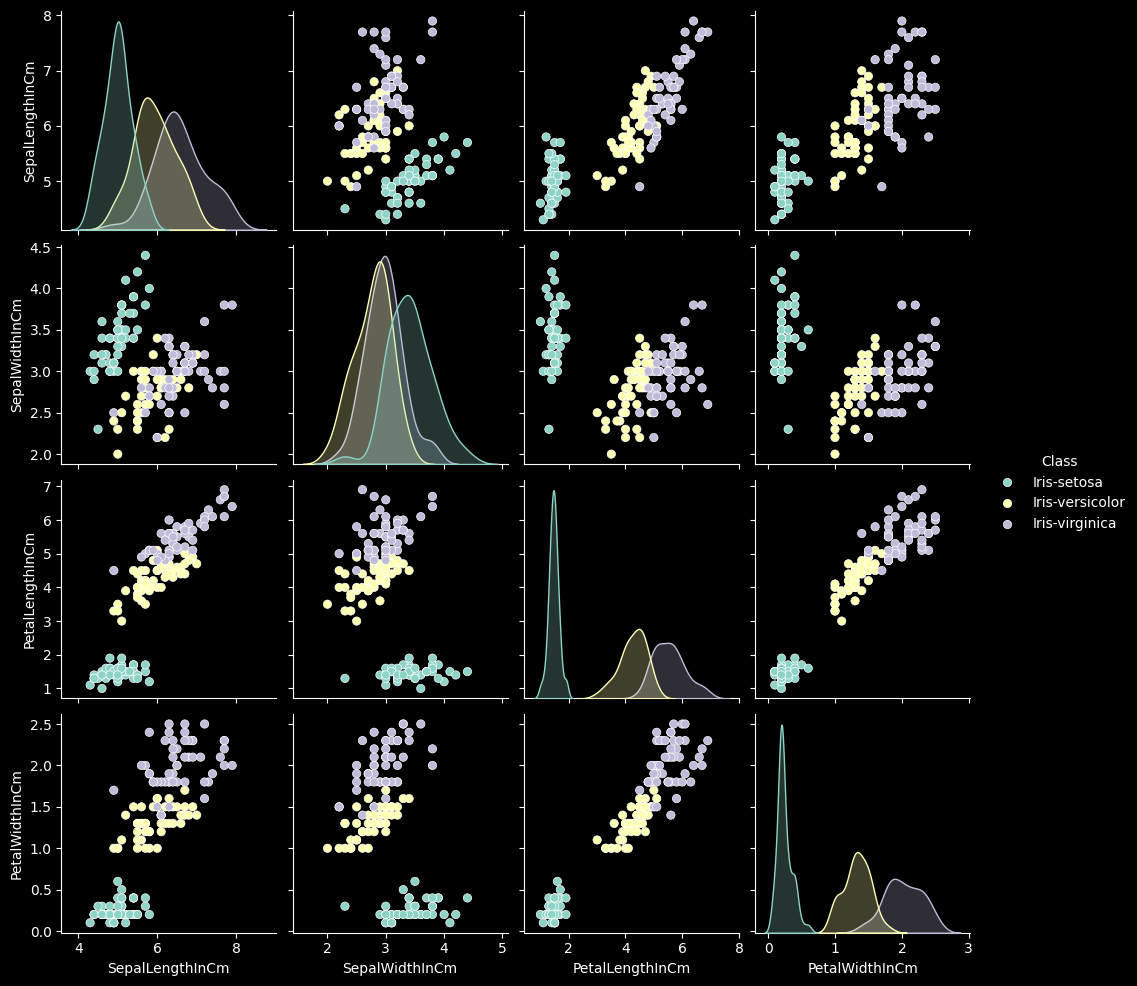

In [103]:
sns.pairplot(df, diag_kind='kde', hue='Class')

### Data Tranformation using `StandardScaler`
- We scale the data to reduce skewness using `StandardScaler` from `sklearn.preprocessing`
- From `features.describe()` it can be seen that the mean and std have be normalized
- A `pairplot` was used to help with the visualisation

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

scaler  = StandardScaler()

features = scaler.fit_transform(df[['SepalLengthInCm','SepalWidthInCm','PetalLengthInCm','PetalWidthInCm']])
pd.DataFrame(features).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


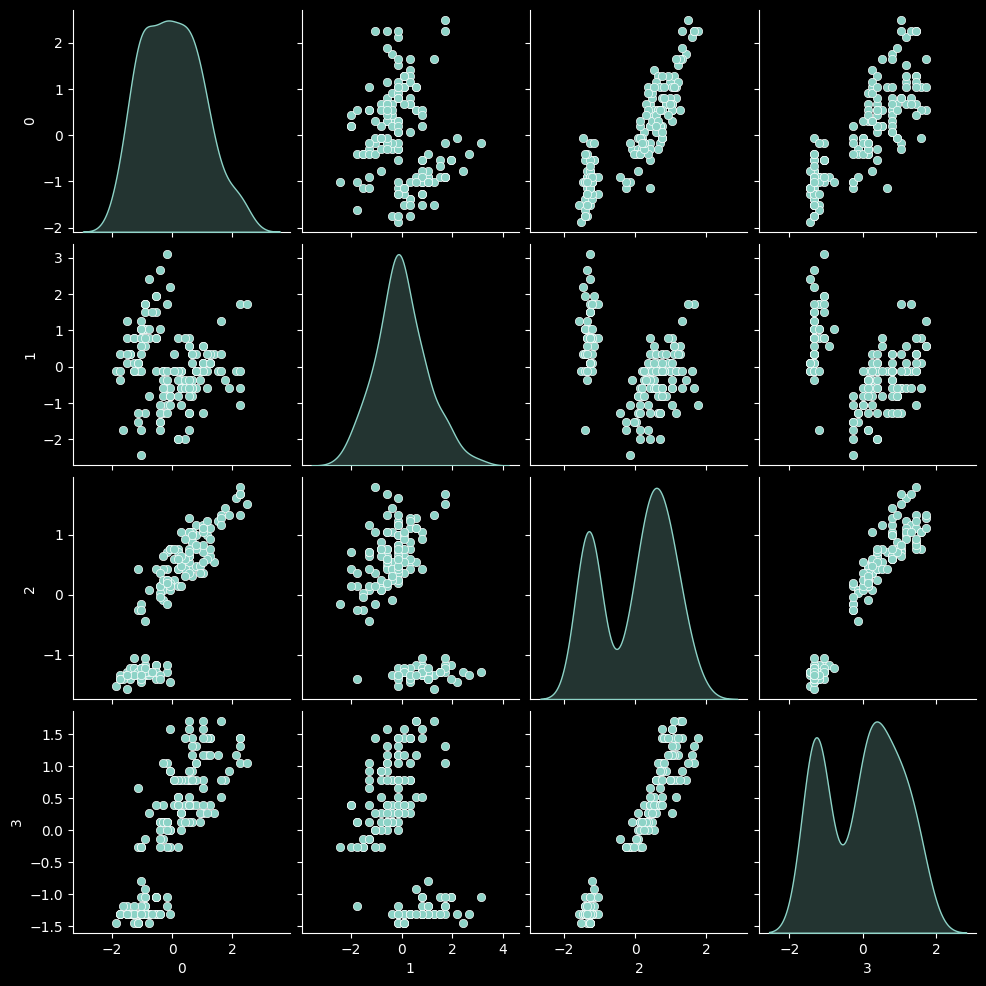

In [105]:
sns.pairplot(pd.DataFrame(features), diag_kind='kde')

### Label Encoding
- Currently the species of flowers or `Class` consists of strings 
- We encode these to numbers from 0 - 1 for better processing

In [106]:
target=df['Class']
target.value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder
# Convert text values to numerical values
target=pd.Series(LabelEncoder().fit_transform(target))
target.value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

### Splitting Data
- We split the data into test and train splits
- The data is shuffled by default which prevents overfitting

In [108]:
#importing train test split from sklearn model selection package for data split 25% for test
from sklearn.model_selection import train_test_split
#split data for train and test
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [109]:
print(f'x_train.shape:{x_train.shape}')
print(f'y_train.shape:{y_train.shape}')
print(f'x_test.shape:{x_test.shape}')
print(f'y_test.shape:{y_test.shape}')

x_train.shape:(120, 4)
y_train.shape:(120,)
x_test.shape:(30, 4)
y_test.shape:(30,)


### Naive Bayes Model
- Fit, predict, measure and improve
- We use the library function of Naive Bayes here

In [110]:
from sklearn.naive_bayes import GaussianNB
bc=GaussianNB()
bc.fit(x_train,y_train)

GaussianNB()

In [111]:
pred = bc.predict(x_test)

### Prediction Metrics
- We measure the metrics by using `sklearn.metrics`
- We can also plot a confusion matrix from this which will show the various metrics such as 
    - TP
    - TN
    - FP
    - FN

In [112]:
#importing metrics
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score, confusion_matrix
print('accuracy:',accuracy_score(pred,y_test))
print('precision:',precision_score(pred,y_test,average='micro'))
print('recall:',recall_score(pred,y_test,average='micro'))
print('f1_score:',f1_score(pred,y_test,average='micro'))

accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


In [113]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [114]:
cm = confusion_matrix(y_test, pred)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50

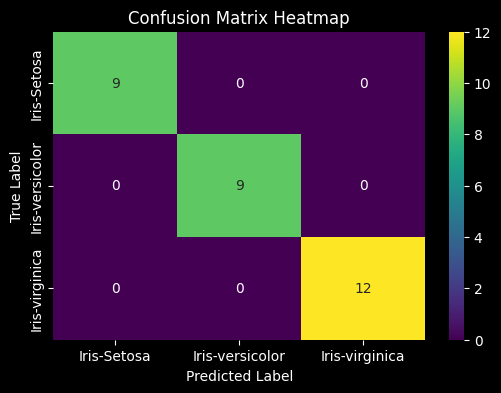

In [115]:
plt.style.use('dark_background')
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["Iris-Setosa", "Iris-versicolor", "Iris-virginica"], yticklabels=["Iris-Setosa", "Iris-versicolor", "Iris-virginica"])
# Labels, Title, and Formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

3 Iris-virginica flowers were confused with Iris-versicolor by the model and the rest were predicted correctly


### Stratified K-Fold Cross Validation
Since the dataset is small, we know that there is a chance the model may not capture the underlying features of given data and hence, perform poorly on tests. <br>
To avoid this we will perform Stratified K-Fold Cross Validation

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[['SepalLengthInCm', 'SepalWidthInCm', 'PetalLengthInCm', 'PetalWidthInCm']])

In [ ]:
bc = GaussianNB()

In [130]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

In [131]:

y_true_all = []
y_pred_all = []

for train_idx, test_idx in kf.split(features_scaled, target):
    X_train, X_test = features_scaled[train_idx], features_scaled[test_idx]
    y_train, y_test = target[train_idx], target[test_idx]

    # Train the model
    bc.fit(X_train, y_train)

    # Predict on test fold
    y_pred = bc.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)


In [132]:
accuracy = accuracy_score(y_true_all, y_pred_all)
precision = precision_score(y_true_all, y_pred_all, average='weighted')
recall = recall_score(y_true_all, y_pred_all, average='weighted')
f1 = f1_score(y_true_all, y_pred_all, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))


Accuracy: 0.9533
Precision: 0.9534
Recall: 0.9533
F1-score: 0.9533

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



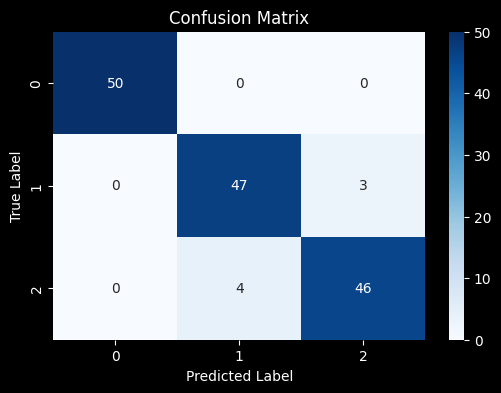

In [133]:
# Confusion Matrix
cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()